In [15]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pandas as pd
import math

data = pd.read_csv('PUBGdata_rå.csv', delimiter=";")
data['kills_per_mand'] = data['kills_total']/data['antal_spillere']

data['spil_farve'] = [
    'g' if i==1
    else 'y' if i==2
    else 'r' if i==3
    else 'cornflowerblue'
    for i in data['plads']
]

data['spil_størrelse'] = [
    10 if i==1
    else 10 if i==2
    else 10 if i==3
    else 3
    for i in data['plads']
]

mvgavg = pd.DataFrame(np.transpose(np.convolve(data['kills_per_mand'], np.ones((20,))/20, mode='full')))
data['moving_avg'] = mvgavg

gennemsnit = data.groupby('dag').agg(
    Average_Kills_Per_Mand = ('kills_per_mand','mean'),
    Antal_spil = ('spil',max)
)


data['dailyavg'] = [
    gennemsnit['Average_Kills_Per_Mand'][1] if i==1
    else gennemsnit['Average_Kills_Per_Mand'][2] if i==2
    else gennemsnit['Average_Kills_Per_Mand'][3] if i==3
    else gennemsnit['Average_Kills_Per_Mand'][4] if i==4
    else gennemsnit['Average_Kills_Per_Mand'][5] if i==5
    else gennemsnit['Average_Kills_Per_Mand'][6] if i==6
    else gennemsnit['Average_Kills_Per_Mand'][7] if i==7
    else gennemsnit['Average_Kills_Per_Mand'][8] if i==8
    else gennemsnit['Average_Kills_Per_Mand'][9] if i==9
    else gennemsnit['Average_Kills_Per_Mand'][10] if i==10
    else 0
    for i in data['dag']
]

data


,spil,kills_total,antal_spillere,plads,dag,ekstra_spiller,kills_per_mand,spil_farve,spil_størrelse,moving_avg,dailyavg
0,1,2,2,0,1,0,1.000000,cornflowerblue,3,0.050000,0.857143
1,2,0,2,0,1,0,0.000000,cornflowerblue,3,0.050000,0.857143
2,3,2,2,0,1,0,1.000000,cornflowerblue,3,0.100000,0.857143
3,4,3,2,0,1,0,1.500000,cornflowerblue,3,0.175000,0.857143
4,5,0,2,0,1,0,0.000000,cornflowerblue,3,0.175000,0.857143
...,...,...,...,...,...,...,...,...,...,...,...
196,197,5,3,0,9,kenneth,1.666667,cornflowerblue,3,1.483333,1.453333
197,198,3,3,0,9,kenneth,1.000000,cornflowerblue,3,1.500000,1.453333
198,199,6,3,0,9,kenneth,2.000000,cornflowerblue,3,1.516667,1.453333
199,200,2,3,0,9,kenneth,0.666667,cornflowerblue,3,1.500000,1.453333


<function matplotlib.pyplot.show(*args, **kw)>

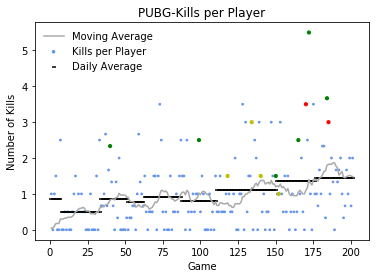

In [40]:
plt.scatter(data['spil'],data['kills_per_mand'], s=data['spil_størrelse'], label='Kills per Player', c=data['spil_farve'])
plt.scatter(data['spil'],data['dailyavg'], s=10, marker='_', label='Daily Average',c='k')
plt.plot(data['spil'],data['moving_avg'],c='darkgrey',label='Moving Average')
plt.tick_params()
plt.xlabel('Game')
plt.ylabel('Number of Kills')
plt.title('PUBG-Kills per Player')
plt.legend(loc='upper left', frameon=False)
plt.savefig('Own.pdf')
plt.show











